In [1]:
#packages
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

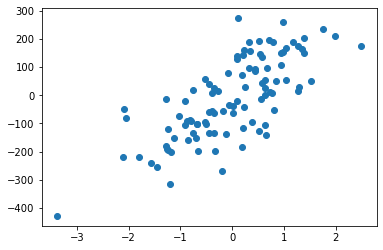

In [52]:
#1-dataset
x,y=make_regression(n_samples=100,n_features=2,noise=10)
#visualiser
plt.scatter(x[:,0],y)


In [53]:
#verifier la dim
print(x.shape)
#y anormal
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [54]:
#matrice
#coler des 1 a x pour X
#ajoueter x**2
X=np.hstack((x,np.ones((x.shape[0],1))))
X

array([[ 1.34135515,  0.55407876,  1.        ],
       [-0.33826298, -1.68654924,  1.        ],
       [ 1.75200554,  0.8237969 ,  1.        ],
       [ 0.4300026 ,  0.47113426,  1.        ],
       [-0.35846812, -0.25984189,  1.        ],
       [-0.66877851, -1.33351479,  1.        ],
       [-2.0990998 ,  1.55618317,  1.        ],
       [ 0.55534686, -0.78061739,  1.        ],
       [-0.45261479, -0.94957254,  1.        ],
       [-0.90799009, -0.04741473,  1.        ],
       [ 0.10042215,  1.39225584,  1.        ],
       [-0.84875616, -0.67632133,  1.        ],
       [-1.18630774, -1.02243163,  1.        ],
       [ 1.27232086,  0.64053045,  1.        ],
       [ 0.20337183, -1.51161299,  1.        ],
       [-0.44738731,  0.72152611,  1.        ],
       [ 0.64007744, -1.78320787,  1.        ],
       [-0.68289314, -0.44115707,  1.        ],
       [-0.35123584, -0.98270421,  1.        ],
       [ 0.22790182, -0.52427858,  1.        ],
       [ 1.27866923, -0.98075407,  1.   

In [55]:
theta=np.random.randn(3,1)*50
theta


array([[-17.89428542],
       [-35.12554007],
       [ 48.46398566]])

In [56]:
from sklearn.linear_model import LinearRegression
h=LinearRegression()
h.fit(X,y)
h.coef_

#h.predict(X)


array([[92.50508982, 97.33570056,  0.        ]])

In [57]:
def model(X,theta):
    
    return X.dot(theta)
    

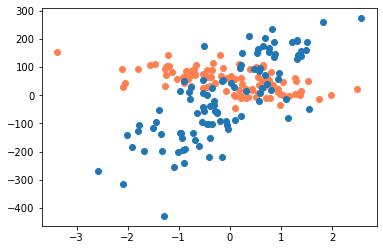

In [95]:
#test
#plt.plot(x,model(X,theta),"r")
plt.scatter(x[:,0], model(X,theta), c='coral')
plt.scatter(x[:,1],y)

In [59]:
#fonction cout

In [60]:
def cost_fct(X,y,theta):
    m=len(y)
    return 1/(2*m)* np.sum((model(X,theta)-y)**2)

In [61]:
cost_fct(X,y,theta)

18738.916898087675

In [62]:
#solution satistifaisante
def coef_deter(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

def satisfaisante(y,pred):
    if(coef_deter(y,pred)<=1 and coef_deter(y,pred)>=0.5):
        return 1
    else:
        return 0

In [96]:
#in individu c'est la solution pour donc contient les Bi et la valeur de la fonction cout de la solution
class Individu:
     def __init__(self, solution):
        self.solution = solution
        self.fitness_value = 0
    
     def __str__(self):
        return "solution"+self.solution
        

In [97]:
#generate individu
def gen_ind():
    ind=Individu(np.random.randn(3,1)*50)
    return ind


In [65]:
#generate population size n 
def gen_pop(n):
    return [gen_ind() for _ in range(n)]



In [66]:
#selection par tournoi 
#j'ai fais un choix arbitraire. l'algorithme retourne d'une maniere alèatoire la population à croiser
def selection(pop,taille):
    best=pop[random.randint(0,len(pop)-1)]
    for i in range (taille):
        nextp=pop[random.randint(0,len(pop)-1)]
        if(cost_fct(X,y,best.solution)>cost_fct(X,y,nextp.solution)):
            best=nextp
    return best

In [98]:
#cross over
#croisement
def cross_over(ind1,ind2):
    c=random.randint(0,len(ind1.solution)-1) #generation de manière aléatoire le point de croisement
    #echange de coefficients
    for i in range(c):
        temp=ind1.solution[i,0]
        ind1.solution[i,0]=ind2.solution[i,0]
        ind2.solution[i,0]=temp
    return ind1,ind2
    
    
    

In [99]:
#mutation
def mutation(ind,proba):
    for i in range(len(ind)-1):
        if(random.random()<proba):
            ind[i]=1-ind[i]
    return ind

In [101]:
def genetic_algo(x,y,theta,popsize,n,n_max):
    best=theta
    n_iterations=0
    #pop initial
    pop=gen_pop(popsize)
    Q=[]
    while( satisfaisante(y,model(x,best))==False ):
        n_iterations+=1
        if(n_iterations>n_max):
            break
        for ind in pop:
            ind.fitness_value=cost_fct(x,y,ind.solution)
        #trier
            
        pop.sort(key=lambda x: x.fitness_value)
            
        if(  cost_fct(x,y,pop[0].solution)< cost_fct(x,y,best)):
            best=pop[0].solution
            print("///")
            print(best)
        #selection des n meilleurs parents 
        Q=pop[:n]
        
       
        #cross over
        
        for i in range(int((len(pop)-n)/2)):
            pa=selection(pop,2)
            pb=selection(pop,2)
            ind1,ind2=cross_over(pa,pb)
            Q.append(ind1)
            Q.append(ind2)
 

            
        P=Q
    return best
    
            
        
            
            
        
        
        
        
        
    
    
    

In [102]:
#Recupreation de la meilleure solution des bi
best=genetic_algo(X,y,theta,100,50,10) 
print("ok")
print(best)


///
[[94.07932388]
 [64.30312454]
 [39.02750193]]
ok
[[94.07932388]
 [64.30312454]
 [39.02750193]]


In [103]:
theta_final=best
theta_final

array([[94.07932388],
       [64.30312454],
       [39.02750193]])

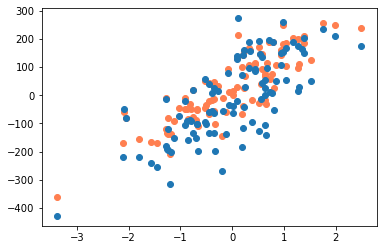

In [104]:
#test
#plt.plot(x,model(X,theta_final),"r")
plt.scatter(x[:,0], model(X,theta_final), c='coral')
plt.scatter(x[:,0],y)

In [105]:
#changement de variable
#ML produire theta
best=genetic_algo(X,y,theta,1000,500,10)
print("ok")
print(best)


///
[[69.9359589 ]
 [86.25231419]
 [ 0.57079083]]
///
[[ 80.76968102]
 [ 96.61629674]
 [-31.74625214]]
ok
[[ 80.76968102]
 [ 96.61629674]
 [-31.74625214]]


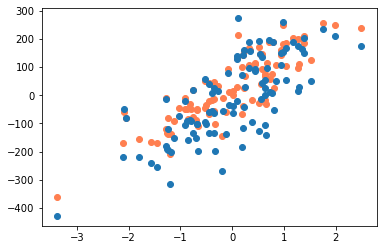

In [106]:
#test
#plt.plot(x,model(X,theta_final),"r")
plt.scatter(x[:,0], model(X,theta_final), c='coral')
plt.scatter(x[:,0],y)

<ipython-input-107-f4362815673b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection = '3d')


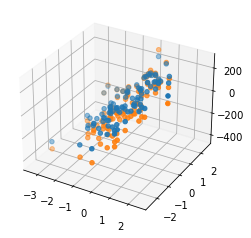

In [107]:
plt.scatter(x[:,0],model(X,theta_final))
#plt.plot(x[:,0],Y,"r")
ax = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],model(X,theta_final))
#ax2 = plt.axes(projection = '3d')
ax.scatter3D(x[:,0],x[:,1],y,"r")